Caminho mais próximo

In [5]:
import os
cwd = os.getcwd()
print(cwd)

I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Atividades


Base de dados

In [2]:
import pandas as pd
mainpath = r'I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064'
subpath = r'\Dados_mestrado'
file = r'\Analises_2022_2023_rev1.csv'
caminho = mainpath + subpath + file
dados = pd.read_csv(caminho, sep = ';')


from datetime import datetime
data_certa = []
data_aux=""

for i, data in enumerate(dados['Data']):
    data_aux = datetime.strptime(data, "%d/%m/%Y")
    data_certa.append(data_aux)

Data2 = pd.DataFrame({'Data_': data_certa})
dados['Data'] = Data2

display(dados)

,Data,Obs,Hora_Coleta,P24h,P72h,P1_pH,P2_pH,P2i_pH,P2ii_pH,P3_pH,...,i_Med_alt,i_Poda,ip24h,ip72h,i2p24h,i2p72h,P1_CF_log,P2_CF_log,P3_CF_log,P24h(0;1)
0,2022-09-27,NaN,12:00,0,"14,2",NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,1,NaN,NaN,NaN,NaN
1,2022-09-28,NaN,NaN,0,"14,2",NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,1,NaN,NaN,NaN,NaN
2,2022-09-29,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,-,NaN,NaN,NaN,NaN
3,2022-09-30,NaN,NaN,"0,8","0,8",NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,1,1,NaN,NaN,NaN,NaN
4,2022-10-01,FINAL DE SEMANA,NaN,3,"4,4",NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,1,1,NaN,NaN,NaN,>0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2023-04-26,NaN,NaN,0,"15,6",NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,1,NaN,NaN,NaN,-
212,2023-04-27,NaN,NaN,0,"0,2",NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,1,NaN,NaN,NaN,-
213,2023-04-28,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,-,NaN,NaN,NaN,-
214,2023-04-29,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,-,-,-,-,NaN,NaN,NaN,-


visão geral das colunas

Há diversas colunas que não foram reconhecidas como float, tentativa de conversão simples

In [4]:
for coluna in dados:
    if dados[coluna].dtype == object:
        try:
          dados[coluna]=dados[coluna].astype(float)
        except:
          pass      
    else:
        pass

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data                   216 non-null    datetime64[ns]
 1   Obs                    47 non-null     object        
 2   Hora_Coleta            59 non-null     object        
 3   P24h                   216 non-null    object        
 4   P72h                   216 non-null    object        
 5   P1_pH                  51 non-null     object        
 6   P2_pH                  32 non-null     object        
 7   P2i_pH                 6 non-null      object        
 8   P2ii_pH                6 non-null      object        
 9   P3_pH                  51 non-null     object        
 10  P1_Cond                55 non-null     float64       
 11  P2_Cond                31 non-null     float64       
 12  P2i_Cond               6 non-null      float64       
 13  P2ii_

Como não houve conversão simples, o describe somente funcionou para as colunas float!!!

In [57]:
dados.describe()

,Data,P1_Cond,P2_Cond,P2i_Cond,P2ii_Cond,P3_Cond,P1_CT,P2_CT,P3_CT,P1_CF,...,P72h.1,Rad Media 24 h (W/m2),RadMin24 h,Rad Max 24 h (W/m2),Mes_,i_Qual1,i_Qual2,i_Vazao,i_Med_alt,i_Poda
count,216,55.000000,31.000000,6.000000,6.000000,56.000000,1.100000e+01,1.300000e+01,10.000,19.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,216.0,216.0,216.000000,216.000000
mean,2023-01-12 12:00:00,288.181818,219.161290,225.666667,222.166667,253.089286,2.082887e+05,1.008297e+06,494653.000,18913.421053,...,21.652778,217.976852,0.004630,887.472222,6.240741,1.0,1.0,1.0,0.023148,0.018519
min,2022-09-27 00:00:00,168.000000,144.000000,190.000000,173.000000,160.000000,2.046000e+03,3.000000e+03,8160.000,31.000000,...,0.000000,39.000000,0.000000,172.000000,1.000000,1.0,1.0,1.0,0.000000,0.000000
25%,2022-11-19 18:00:00,226.500000,198.000000,217.500000,217.500000,219.250000,4.495000e+04,3.076000e+05,104380.000,1850.000000,...,0.000000,160.750000,0.000000,752.000000,2.000000,1.0,1.0,1.0,0.000000,0.000000
50%,2023-01-12 12:00:00,262.000000,221.000000,226.500000,223.000000,248.500000,1.112000e+05,9.139000e+05,223365.000,8560.000000,...,5.000000,225.000000,0.000000,965.000000,4.000000,1.0,1.0,1.0,0.000000,0.000000
75%,2023-03-07 06:00:00,316.000000,241.000000,236.250000,239.000000,260.500000,1.944500e+05,1.553100e+06,583425.000,17064.500000,...,23.000000,280.000000,0.000000,1058.250000,11.000000,1.0,1.0,1.0,0.000000,0.000000
max,2023-04-30 00:00:00,647.000000,293.000000,257.000000,254.000000,526.000000,1.046200e+06,2.419600e+06,1732900.000,86800.000000,...,313.000000,380.000000,1.000000,1178.000000,12.000000,1.0,1.0,1.0,1.000000,1.000000
std,NaN,98.477689,30.532056,22.677448,28.102788,60.059751,3.040177e+05,8.830460e+05,602121.394,27396.872811,...,46.125459,78.249894,0.068041,219.774407,4.317343,0.0,0.0,0.0,0.150723,0.135130


3. Usar o método "describe" para analisar as estatísticas de sua série de dados e responder as seguintes perguntas:

(a) Qual a média da sua série de dados?

R: Condutividade no ponto 1: Média de 288 microS/cm2.
 
(b) Qual o valor do meio (percentil 50%)? 

R: 288 microS/cm2.

(c) Qual a faixa de valores entre os percentis 25% e 75%?

R: 226 microS/cm2 e 316 microS/cm2.



4. Plotar um gráfico de linha dos seus dados contendo média e o intervalo do desvio padrão. 
Lembre-se de adicionar os "labels" dos eixos e legendas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13996\3245814230.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(dados['Data'], rotation=30, ha='right',fontsize=7)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13996\3245814230.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(dados['Data'], rotation=30, ha='right',fontsize=7)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13996\3245814230.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(dados['Data'], rotation=30, ha='right',fontsize=7)


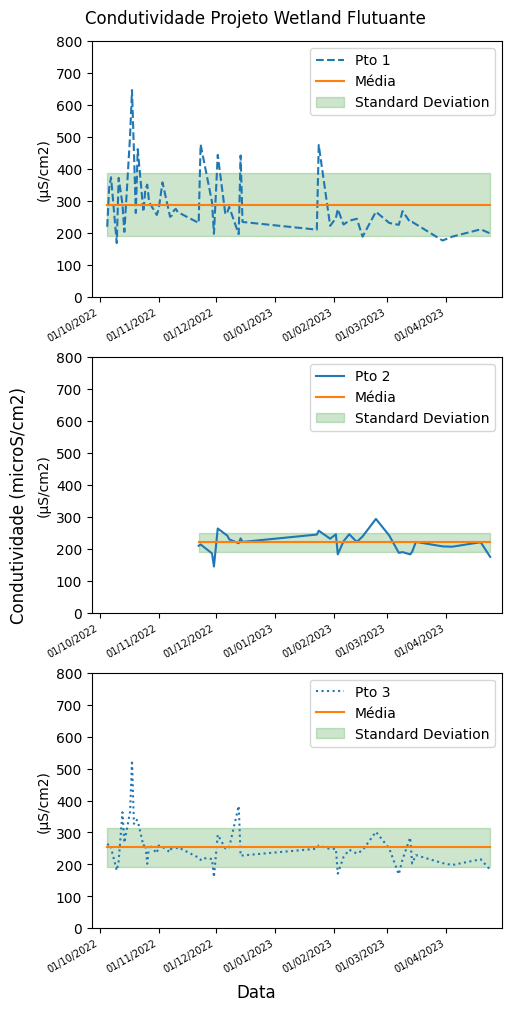

In [68]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Potando dados válidos e adicionando o eixo de plotagem a uma variável
fig, axs = plt.subplots(3, 1,figsize=(5, 10), layout='constrained')

dados_pto1 = dados[['Data','P1_Cond']][dados['P1_Cond'].notnull()==True]
dados_pto1
dados_pto2 = dados[['Data','P2_Cond']][dados['P2_Cond'].notnull()==True]
dados_pto3 = dados[['Data','P3_Cond']][dados['P3_Cond'].notnull()==True]

axs[0].plot(dados_pto1['Data'],dados_pto1['P1_Cond'] , label = 'Pto 1', linestyle='--')
axs[1].plot(dados_pto2['Data'],dados_pto2['P2_Cond'] , label = 'Pto 2', linestyle='-')
axs[2].plot(dados_pto3['Data'],dados_pto3['P3_Cond'] , label = 'Pto 3', linestyle=':')

axs[0].set_xlim(dados['Data'].min().to_pydatetime(),dados['Data'].max().to_pydatetime())
axs[0].set_ylim(0,800)
axs[1].set_xlim(dados['Data'].min().to_pydatetime(),dados['Data'].max().to_pydatetime())
axs[1].set_ylim(0,800)
axs[2].set_xlim(dados['Data'].min().to_pydatetime(),dados['Data'].max().to_pydatetime())
axs[2].set_ylim(0,800)

# Set the y-label for the entire figure
fig.supylabel('Condutividade')
fig.supxlabel('Data')# Add a y-label to the Axes.
axs[0].set_ylabel('(µS/cm2)') 
axs[1].set_ylabel('(µS/cm2)')
axs[2].set_ylabel('(µS/cm2)')

# Rotacionando os labels de data
axs[0].set_xticklabels(dados['Data'], rotation=30, ha='right',fontsize=7)
axs[1].set_xticklabels(dados['Data'], rotation=30, ha='right',fontsize=7)
axs[2].set_xticklabels(dados['Data'], rotation=30, ha='right',fontsize=7)

#formatar data
date_format = mdates.DateFormatter('%d/%m/%Y')
axs[0].xaxis.set_major_formatter(date_format)
axs[1].xaxis.set_major_formatter(date_format)
axs[2].xaxis.set_major_formatter(date_format)

#linha vertical


# Set the y-label for the entire figure
fig.supylabel('Condutividade (microS/cm2)')  # Add a y-label to the Axes.

# Set the title for the entire figure
fig.suptitle('Condutividade Projeto Wetland Flutuante')  # Add a title to the Axes.



# Plotando a área do desvio padrão
mean_pto1 = dados_pto1['P1_Cond'].mean()
std_pto1 = dados_pto1['P1_Cond'].std()
number_elements_pto1 = len(dados_pto1['P1_Cond'])

mean_pto2 = dados_pto2['P2_Cond'].mean()
std_pto2 = dados_pto2['P2_Cond'].std()
number_elements_pto2 = len(dados_pto2['P2_Cond'])

mean_pto3 = dados_pto3['P3_Cond'].mean()
std_pto3 = dados_pto3['P3_Cond'].std()
number_elements_pto3 = len(dados_pto3['P3_Cond'])

axs[0].fill_between(
    dados_pto1['Data'], number_elements_pto1 * [mean_pto1 - std_pto1], number_elements_pto1 * [mean_pto1 + std_pto1],
    color='green', alpha=.2)

axs[1].fill_between(
    dados_pto2['Data'], number_elements_pto2 * [mean_pto2 - std_pto2], number_elements_pto2 * [mean_pto2 + std_pto2],
    color='green', alpha=.2)

axs[2].fill_between(
    dados_pto3['Data'], number_elements_pto3 * [mean_pto3 - std_pto3], number_elements_pto3 * [mean_pto3 + std_pto3],
    color='green', alpha=.2)

# Pegando um valor médio
mean_pto1_df = dados_pto1.copy()
mean_pto1_df.loc[:, 'mean_pto1'] = mean_pto1
mean_pto1_df = mean_pto1_df[['mean_pto1']]
axs[0].plot(dados_pto1['Data'],mean_pto1_df['mean_pto1'], label = 'Média')

mean_pto2_df = dados_pto2.copy()
mean_pto2_df.loc[:, 'mean_pto2'] = mean_pto2
mean_pto2_df = mean_pto2_df[['mean_pto2']]
axs[1].plot(dados_pto2['Data'],mean_pto2_df['mean_pto2'], label = 'Média')

mean_pto3_df = dados_pto3.copy()
mean_pto3_df.loc[:, 'mean_pto3'] = mean_pto3
mean_pto3_df = mean_pto3_df[['mean_pto3']]
axs[2].plot(dados_pto3['Data'],mean_pto3_df['mean_pto3'], label = 'Média')


# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = axs[0].get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
axs[0].legend(handles, labels)

std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = axs[1].get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
axs[1].legend(handles, labels)

std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = axs[2].get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
axs[2].legend(handles, labels)